**Heart Disease Prediction By TAJUL ISLAM AYON**

In [ ]:
import numpy as np 
import pandas as pd 
pd.set_option("display.max_rows",None) 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, linear_model, metrics
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart (3).csv


In [ ]:
df = pd.read_csv('heart.csv')
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [ ]:
df.shape

(918, 12)

In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df = df.dropna(axis=1)

In [ ]:
df.shape

(918, 12)

In [ ]:
df.isnull().values.any()

False

In [ ]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'Actual numbers in the database')

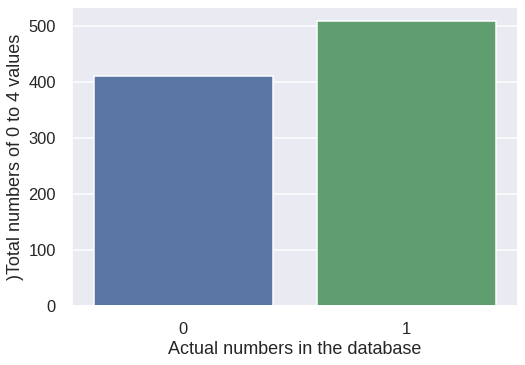

In [ ]:
sns.countplot(df['HeartDisease'])
plt.ylabel(')Total numbers of 0 to 4 values')
plt.xlabel('Actual numbers in the database')

In [ ]:
df.loc[df["HeartDisease"]==2,"HeartDisease"]=1
df.loc[df["HeartDisease"]==3,"HeartDisease"]=1
df.loc[df["HeartDisease"]==4,"HeartDisease"]=1
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [ ]:
df.shape

(918, 12)

In [ ]:
df.size

11016

In [ ]:
def dataset_description(df):
    columns=df.columns.to_list()
    print('No. of Columns in DataFrame: ',len(columns))
    print('\nColumn attribute Names: ',columns)
    ncol=df.describe().columns.to_list()
    ccol=[]
    for i in columns:
        if(ncol.count(i)==0):
            ccol.append(i)
        else:
            continue
    print('\nNo. of Numerical Column in DataFrame: ',len(ncol))
    print('\nNumerical Column Names: ',ncol)
    print('\nNo. of Categorical Column in DataFrame: ',len(ccol))
    print('\nCategorical Column Names: ',ccol)
    
dataset_description(df)

No. of Columns in DataFrame:  12

Column attribute Names:  ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

No. of Numerical Column in DataFrame:  7

Numerical Column Names:  ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']

No. of Categorical Column in DataFrame:  5

Categorical Column Names:  ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [ ]:
df.isnull().sum() 

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [ ]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [ ]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Age            -0.195933
RestingBP       0.179839
Cholesterol    -0.610086
FastingBS       1.264484
MaxHR          -0.144359
Oldpeak         1.022872
HeartDisease   -0.215086
dtype: float64

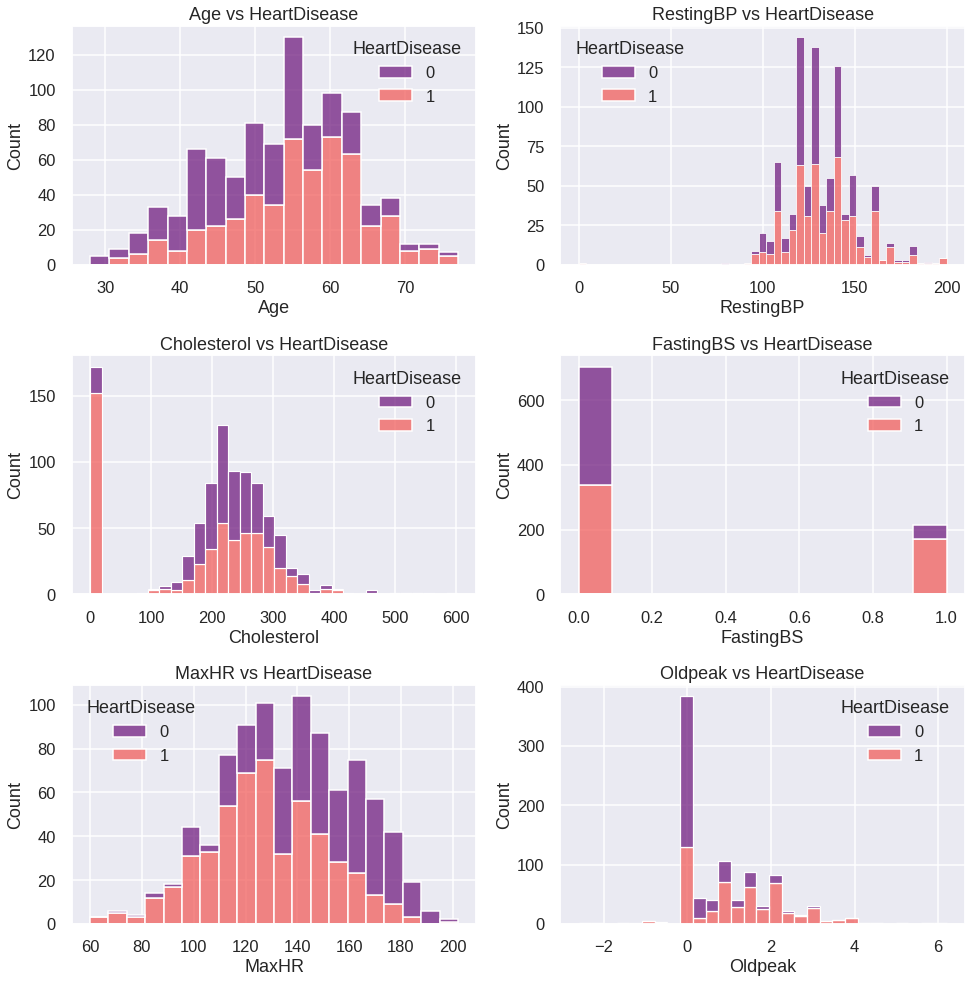

In [ ]:
plt.figure(figsize=(14,14))
plt.subplot(3,2,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='Age', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Age vs HeartDisease')

plt.subplot(3,2,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='RestingBP', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('RestingBP vs HeartDisease')

plt.subplot(3,2,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='Cholesterol', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Cholesterol vs HeartDisease')

plt.subplot(3,2,4)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='FastingBS', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('FastingBS vs HeartDisease')

plt.subplot(3,2,5)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='MaxHR', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('MaxHR vs HeartDisease')

plt.subplot(3,2,6)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='Oldpeak', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Oldpeak vs HeartDisease')
plt.show()

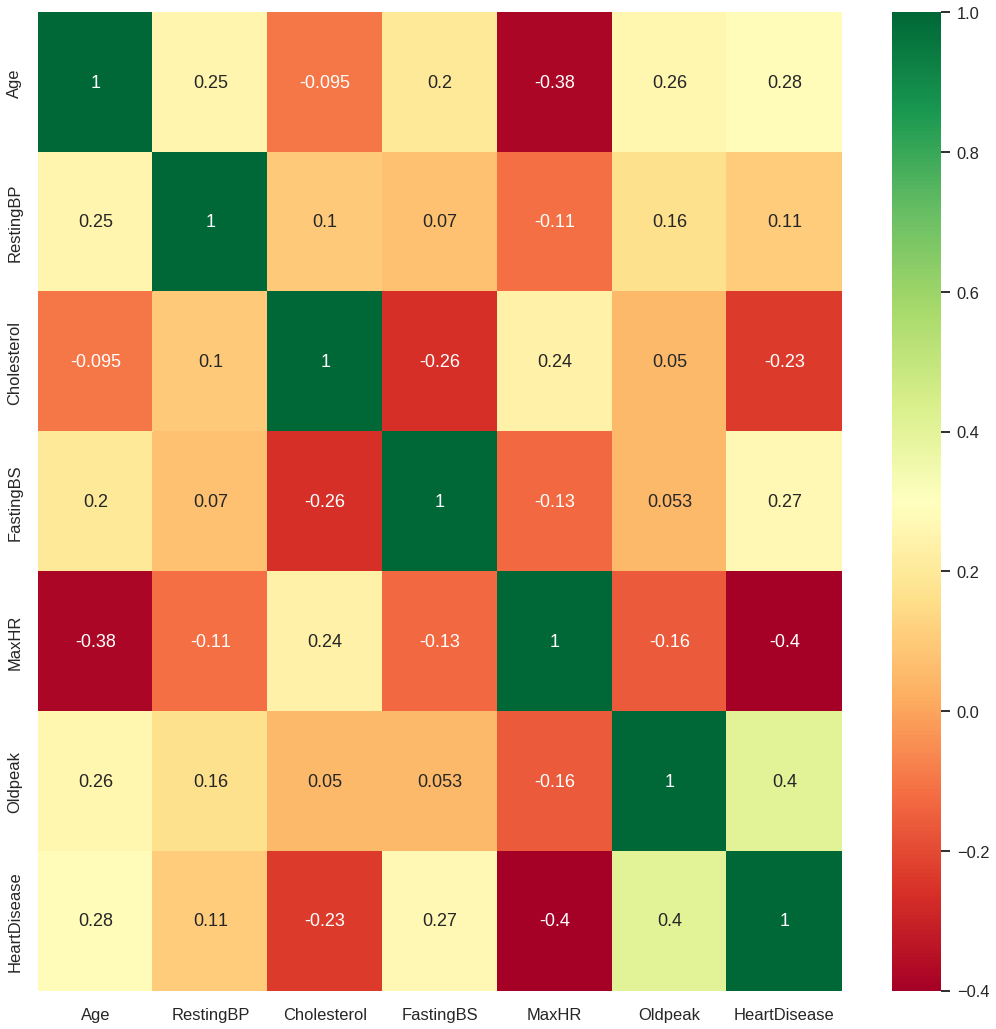

In [ ]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(18,18))
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff64c809350>,
      dtype=object)

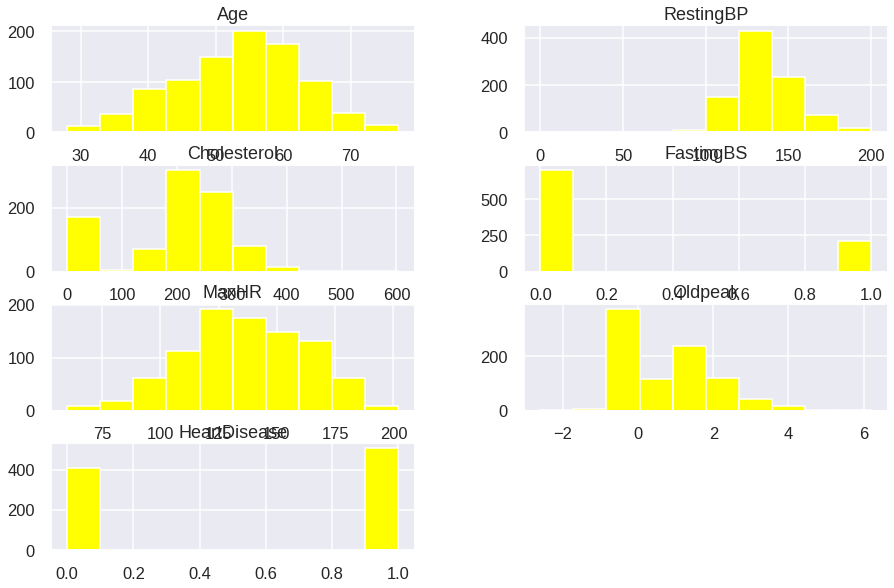

In [ ]:
df.hist(layout = (10, 2),
            figsize = (15, 25),
            color=['green'])

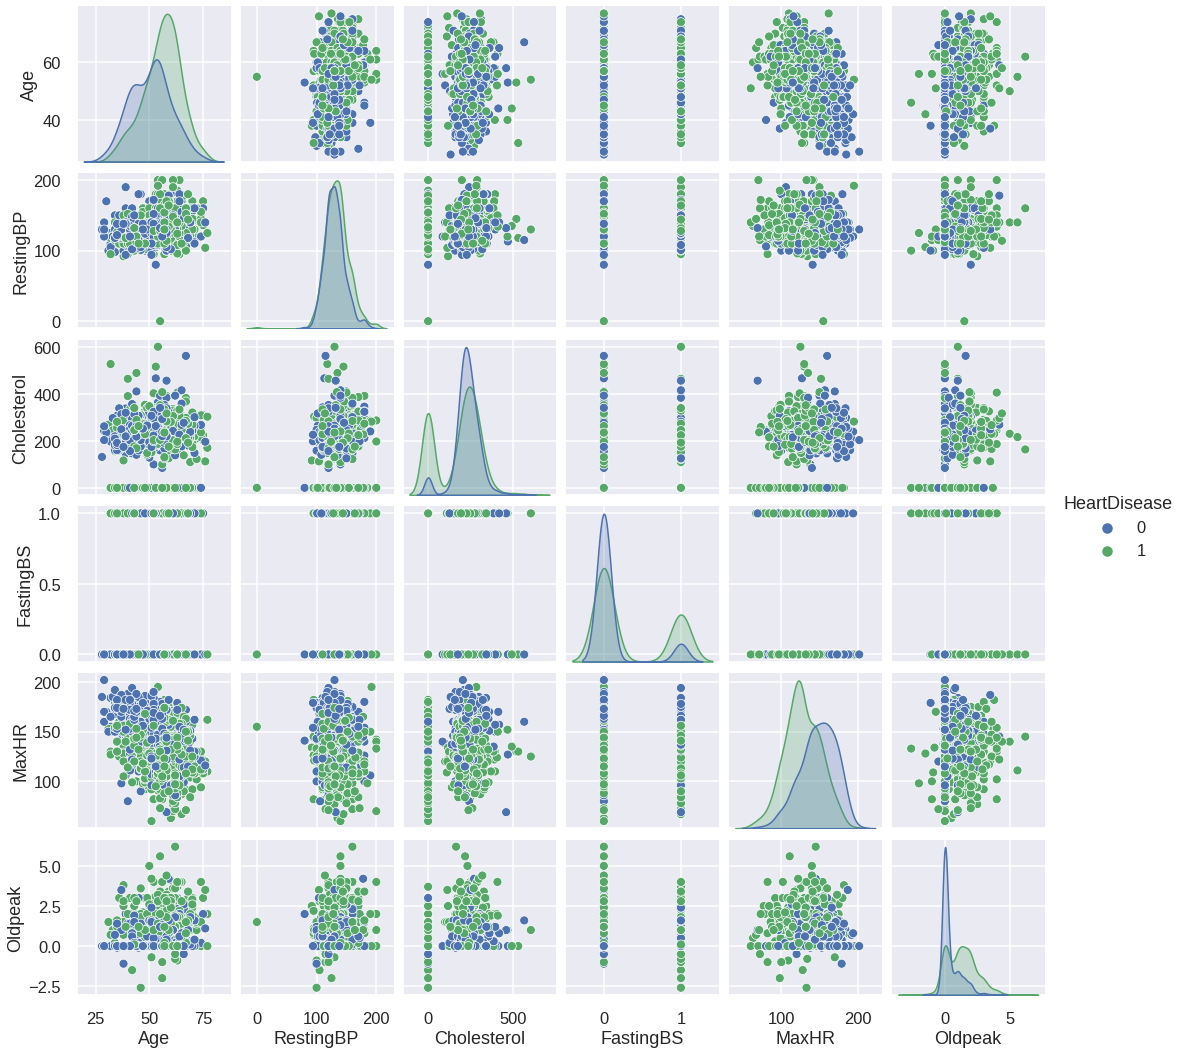

In [ ]:
sns.pairplot(df,hue='HeartDisease')

In [ ]:
df1= df.groupby('Sex').agg({'Age' : 'mean', "ChestPainType":'count','RestingBP':'mean','Cholesterol':'mean',
                            'FastingBS':'sum','RestingECG':'count','MaxHR':'mean','ExerciseAngina':'count','Oldpeak':'mean',
                            'ST_Slope':'count','HeartDisease':'sum'})
df1
# average age is same for both male and female

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Sex,,,,,,,,,,,
F,52.492228,193,132.212435,241.196891,26,193,146.139896,193,0.668912,193,50
M,53.782069,725,132.445517,187.513103,188,725,134.325517,725,0.945517,725,458


In [ ]:
import plotly.express as px
px.bar(data_frame=df1, barmode='group', title = "Gender wise Analyzing",template="plotly_dark")

**#Data Preprocessing**

In [ ]:
def outliers_graph(df_column):
    Q75, Q25 = np.percentile(df_column, [75 ,25]) 
    IQR = Q75 - Q25
    print('Q25: ',Q25)
    print('Q75: ',Q75)
    print('Inter Quartile Range: ',IQR)
    print('Outliers lie before', Q25-1.5*IQR, 'and beyond', Q75+1.5*IQR)
    print('Number of Rows with Left Extreme Outliers:', len(df[df_column <Q25-1.5*IQR]))
    print('Number of Rows with Right Extreme Outliers:', len(df[df_column>Q75+1.5*IQR]))

In [ ]:
outliers_graph(df['Age'])

Q25:  47.0
Q75:  60.0
Inter Quartile Range:  13.0
Outliers lie before 27.5 and beyond 79.5
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 0


In [ ]:
outliers_graph(df['RestingBP'])

Q25:  120.0
Q75:  140.0
Inter Quartile Range:  20.0
Outliers lie before 90.0 and beyond 170.0
Number of Rows with Left Extreme Outliers: 2
Number of Rows with Right Extreme Outliers: 26


In [ ]:
df=df[df.RestingBP>=90]
len(df)

916

In [ ]:
outliers_graph(df['Cholesterol'])

Q25:  174.75
Q75:  267.0
Inter Quartile Range:  92.25
Outliers lie before 36.375 and beyond 405.375
Number of Rows with Left Extreme Outliers: 170
Number of Rows with Right Extreme Outliers: 12


In [ ]:
df=df[df.Cholesterol<=450] 
len(df)

908

In [ ]:

outliers_graph(df['FastingBS'])

Q25:  0.0
Q75:  0.0
Inter Quartile Range:  0.0
Outliers lie before 0.0 and beyond 0.0
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 211


In [ ]:
outliers_graph(df['MaxHR'])

Q25:  120.0
Q75:  156.0
Inter Quartile Range:  36.0
Outliers lie before 66.0 and beyond 210.0
Number of Rows with Left Extreme Outliers: 2
Number of Rows with Right Extreme Outliers: 0


In [ ]:
df=df[df.MaxHR>=70]
len(df)

905

In [ ]:
outliers_graph(df['Oldpeak'])

Q25:  0.0
Q75:  1.5
Inter Quartile Range:  1.5
Outliers lie before -2.25 and beyond 3.75
Number of Rows with Left Extreme Outliers: 1
Number of Rows with Right Extreme Outliers: 15


In [ ]:
print('Mean: ',df['Cholesterol'].mean())
print('Median: ',df['Cholesterol'].median())

Mean:  197.12817679558012
Median:  222.0


In [ ]:
mc=df[df['Cholesterol']>0].Cholesterol.mean() #mean value of Cholesterol without including the cholesterol=0
print('Mean of Cholesterol>0: ',mc)

Mean of Cholesterol>0:  241.7357723577236


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,905.0,53.522652,9.434672,28.0,47.0,54.0,60.0,77.0
RestingBP,905.0,132.632044,17.989810,92.0,120.0,130.0,140.0,200.0
Cholesterol,905.0,197.128177,105.005105,0.0,175.0,222.0,266.0,417.0
FastingBS,905.0,0.232044,0.422370,0.0,0.0,0.0,0.0,1.0
MaxHR,905.0,137.101657,25.156164,70.0,120.0,138.0,156.0,202.0
Oldpeak,905.0,0.889834,1.070970,-2.6,0.0,0.6,1.5,6.2
HeartDisease,905.0,0.551381,0.497628,0.0,0.0,1.0,1.0,1.0


**#One Hot Encoding**

In [ ]:
def OneHotEncoding(dfcolumn):
  global df
  dfcolumn.nunique()
  len(df.columns)
  finallencol = (dfcolumn.nunique() - 1) + (len(df.columns)-1)
  dummies = pd.get_dummies(dfcolumn, drop_first=True, prefix=dfcolumn.name)
  df=pd.concat([df,dummies],axis='columns')
  df.drop(columns=dfcolumn.name,axis=1,inplace=True) 
  if(finallencol==len(df.columns)):
    print('OneHotEncoding is sucessfull') 
    print('')
  else:
    print('Unsucessfull')
  return df.head(5)

In [ ]:
OneHotEncoding(df['ChestPainType'])
OneHotEncoding(df['Sex'])
OneHotEncoding(df['RestingECG'])
OneHotEncoding(df['ExerciseAngina'])
OneHotEncoding(df['ST_Slope'])

OneHotEncoding is sucessfull

OneHotEncoding is sucessfull

OneHotEncoding is sucessfull

OneHotEncoding is sucessfull

OneHotEncoding is sucessfull



,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,Sex_M,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,0,1,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,1,0,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,0,1,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,0,1,0,1,1,0,0,0,1


In [ ]:
df.describe().columns.to_list()

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'Sex_M',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ExerciseAngina_Y',
 'ST_Slope_Flat',
 'ST_Slope_Up']

Imputation

In [ ]:
#Zero value of cholesterol are filled usnig KNNImputer
from sklearn.impute import KNNImputer
df['Cholesterol'].replace(to_replace = 0, value =np.nan, inplace=True)
KNN_imputed = KNNImputer(n_neighbors=5)
I=KNN_imputed.fit_transform(df)
Cholesterol=[]
for i in range(0,len(df)):
  Cholesterol.append(I[i][2])
df['Cholesterol']=Cholesterol

**# Feature Scaling**

In [ ]:
 
# altering the DataFrame
df = df[['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'Sex_M',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ExerciseAngina_Y',
 'ST_Slope_Flat',
 'ST_Slope_Up',
 'HeartDisease',]]
 
# printing the altered DataFrame
df.head(5)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,Sex_M,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289.0,0,172,0.0,1,0,0,1,1,0,0,0,1,0
1,49,160,180.0,0,156,1.0,0,1,0,0,1,0,0,1,0,1
2,37,130,283.0,0,98,0.0,1,0,0,1,0,1,0,0,1,0
3,48,138,214.0,0,108,1.5,0,0,0,0,1,0,1,1,0,1
4,54,150,195.0,0,122,0.0,0,1,0,1,1,0,0,0,1,0


In [ ]:
scaler = StandardScaler()
scaler.fit(df.drop('HeartDisease',axis = 1))

StandardScaler()

In [ ]:
scaled_features = scaler.transform(df.drop('HeartDisease',axis = 1))
df_feat = pd.DataFrame(scaled_features,columns = df.columns[:-1])
df_feat.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,Sex_M,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.434086,0.409789,0.980973,-0.549689,1.388035,-0.831327,2.064371,-0.532624,-0.23141,0.517211,0.820261,-0.493084,-0.825927,-0.996691,1.141402
1,-0.479630,1.522144,-1.278327,-0.549689,0.751656,0.102922,-0.484409,1.877498,-0.23141,-1.933448,0.820261,-0.493084,-0.825927,1.003320,-0.876115
2,-1.752238,-0.146388,0.856608,-0.549689,-1.555216,-0.831327,2.064371,-0.532624,-0.23141,0.517211,-1.219124,2.028052,-0.825927,-0.996691,1.141402
3,-0.585681,0.298554,-0.573591,-0.549689,-1.157480,0.570047,-0.484409,-0.532624,-0.23141,-1.933448,0.820261,-0.493084,1.210760,1.003320,-0.876115
4,0.050623,0.965967,-0.967414,-0.549689,-0.600648,-0.831327,-0.484409,1.877498,-0.23141,0.517211,0.820261,-0.493084,-0.825927,-0.996691,1.141402


In [ ]:
df.head(5)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,Sex_M,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289.0,0,172,0.0,1,0,0,1,1,0,0,0,1,0
1,49,160,180.0,0,156,1.0,0,1,0,0,1,0,0,1,0,1
2,37,130,283.0,0,98,0.0,1,0,0,1,0,1,0,0,1,0
3,48,138,214.0,0,108,1.5,0,0,0,0,1,0,1,1,0,1
4,54,150,195.0,0,122,0.0,0,1,0,1,1,0,0,0,1,0


#**.Feature Selection**

In [ ]:
col=df.describe().columns.to_list()
print(col)

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'Sex_M', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up', 'HeartDisease']


In [ ]:

print('RestingBP',df['RestingBP'].unique())
print('Cholesterol',df['Cholesterol'].unique())
print('FastingBS',df['FastingBS'].unique())
print('MaxHR',df['MaxHR'].unique())



RestingBP [140 160 130 138 150 120 110 136 115 100 124 125 112 132 170 142 118 190
 135 180 108 145 155 128 106  92 200 122  98 105 133  95 137 185 165 126
 152 116 144 154 134 104 139 131 141 178 146 158 123 102  96 143 172 156
 114 127 101 174  94 148 117 192 129 164]
Cholesterol [289.  180.  283.  214.  195.  339.  237.  208.  207.  284.  211.  164.
 204.  234.  273.  196.  201.  248.  267.  223.  184.  288.  215.  209.
 260.  188.  167.  224.  172.  186.  254.  306.  250.  177.  227.  230.
 294.  264.  259.  175.  318.  216.  340.  233.  205.  245.  194.  270.
 213.  365.  342.  253.  277.  202.  297.  225.  246.  412.  265.  182.
 218.  268.  163.  100.  206.  238.  139.  263.  291.  229.  307.  210.
 329.  147.   85.  269.  275.  179.  392.  129.  241.  255.  276.  282.
 338.  160.  156.  272.  240.  393.  161.  228.  292.  388.  166.  247.
 331.  341.  243.  279.  198.  249.  168.  159.  190.  185.  290.  212.
 231.  222.  235.  320.  187.  266.  287.  404.  312.  251.  328.  28

In [ ]:
X = df_feat
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**#Cross validation and model comparision**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
cv = KFold(n_splits=10, random_state=100, shuffle=True)
model = KNeighborsClassifier(n_neighbors=36)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy of KNN: %.4f (%.4f)' % (np.mean(scores), np.std(scores)))
model = SVC(kernel='rbf')
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy of SVC: %.4f (%.4f)' % (np.mean(scores), np.std(scores)))
model=RandomForestClassifier(n_estimators =40,random_state=100)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy of RandomForest: %.4f (%.4f)' % (np.mean(scores), np.std(scores)))
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy of Multi Layer Perceptron: %.4f (%.4f)' % (np.mean(scores), np.std(scores)))

scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy of Logistic Regression : %.4f (%.4f)' % (np.mean(scores), np.std(scores)))

Accuracy of KNN: 0.8607 (0.0317)
Accuracy of SVC: 0.8641 (0.0436)
Accuracy of RandomForest: 0.8563 (0.0474)
Accuracy of Multi Layer Perceptron: 0.8563 (0.0474)
Accuracy of Logistic Regression : 0.8563 (0.0474)


#K-value estimation

In [ ]:
from matplotlib import pyplot
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    print(i,np.mean(pred_i != y_test))

1 0.1894273127753304
2 0.21145374449339208
3 0.12334801762114538
4 0.16740088105726872
5 0.1013215859030837
6 0.12334801762114538
7 0.10572687224669604
8 0.1145374449339207
9 0.1013215859030837
10 0.11013215859030837
11 0.09691629955947137
12 0.1145374449339207
13 0.1013215859030837
14 0.10572687224669604
15 0.1013215859030837
16 0.11894273127753303
17 0.09691629955947137
18 0.12334801762114538
19 0.1013215859030837
20 0.09691629955947137
21 0.1013215859030837
22 0.09691629955947137
23 0.09691629955947137
24 0.10572687224669604
25 0.10572687224669604
26 0.10572687224669604
27 0.09251101321585903
28 0.09691629955947137
29 0.09691629955947137
30 0.1013215859030837
31 0.09691629955947137
32 0.1013215859030837
33 0.1013215859030837
34 0.1013215859030837
35 0.1013215859030837
36 0.10572687224669604
37 0.1013215859030837
38 0.1013215859030837
39 0.1013215859030837


Text(0, 0.5, 'Error Rate')

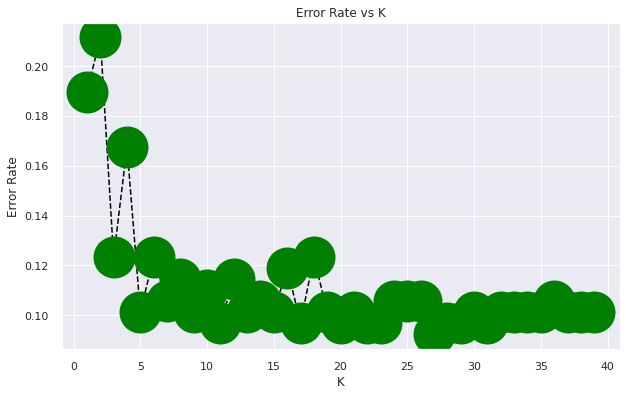

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'black',linestyle = '--',marker = 'o',markerfacecolor='green',markersize =42)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

RF_Classifier**

In [ ]:
print("Training Random Forest")
rf = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 100)
    rf_classifier.fit(X_train,y_train)
    rf.append(rf_classifier.score(X_test,y_test))

Training Random Forest


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, log_loss
from sklearn import metrics
from sklearn import metrics

print('Confusion matrix of model',i , 'is :')
cm = confusion_matrix(y_test, rf_classifier.predict(X_test))
TP = cm[0][0]
TN = cm[1][1]
FP = cm[1][0]
FN = cm[0][1]
print(cm)
print()
result1 = classification_report(y_test, rf_classifier.predict(X_test))
print("Classification Report : ",)
print (result1)
print()
var = ((TP + TN)/(TP + TN + FP + FN)) *100
print('Testing accuracy : ',var)
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_classifier.predict(X_test)))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rf_classifier.predict(X_test)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf_classifier.predict(X_test))))
print('Log_Loss:', metrics.log_loss(y_test, rf_classifier.predict(X_test)))

Confusion matrix of model 1000 is :
[[ 95   0]
 [  5 127]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        95
           1       1.00      0.96      0.98       132

    accuracy                           0.98       227
   macro avg       0.97      0.98      0.98       227
weighted avg       0.98      0.98      0.98       227


Testing accuracy :  97.79735682819384
Sensitivity :  0.95
Specificity :  1.0
false positive rate :  0.0
false negative rate :  0.05
Negative Predictive Value :  0.9621212121212122
False Discovery rate :  0.0
Mean Absolute Error: 0.022026431718061675
Mean Squared Error: 0.022026431718061675
Root Mean Squared Error: 0.14841304429888122
Log_Loss: 0.7607659998879012


Text(0.5, 1.0, 'Random Forest')

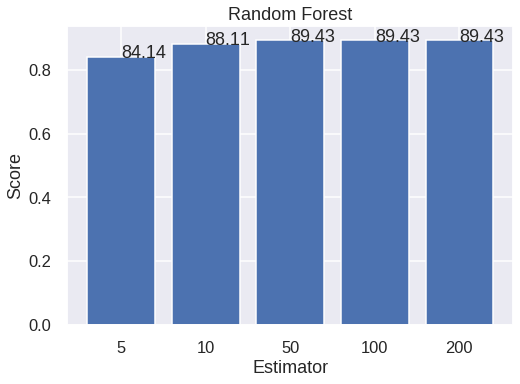

In [ ]:
plt.bar([i for i in range(len(estimators))], rf)
for i in range(len(estimators)):
    plt.text(i, round(rf[i],2), round(rf[i]*100,2))
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Estimator')
plt.ylabel('Score')
plt.title('Random Forest')

**#KNN** classifier

In [ ]:
print("Training K-Nearest Neighbors")
knn = []
for i in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors = i)
    knn_classifier.fit(X_train,y_train)
    knn.append(knn_classifier.score(X_test,y_test))

Training K-Nearest Neighbors


In [ ]:
print('Confusion matrix of model',i , 'is :')
cm = confusion_matrix(y_test, knn_classifier.predict(X_test))
TP = cm[0][0]
TN = cm[1][1]
FP = cm[1][0]
FN = cm[0][1]
print(cm)
print()
result1 = classification_report(y_test,  knn_classifier.predict(X_test))
print("Classification Report : ",)
print (result1)
print()
var = ((TP + TN)/(TP + TN + FP + FN)) *100
print('Testing accuracy : ',var)
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,  knn_classifier.predict(X_test)))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,  knn_classifier.predict(X_test)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,  knn_classifier.predict(X_test))))
print('Log_Loss:', metrics.log_loss(y_test,  knn_classifier.predict(X_test)))

Confusion matrix of model 20 is :
[[ 88   9]
 [ 13 117]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        97
           1       0.93      0.90      0.91       130

    accuracy                           0.90       227
   macro avg       0.90      0.90      0.90       227
weighted avg       0.90      0.90      0.90       227


Testing accuracy :  90.30837004405286
Sensitivity :  0.9072164948453608
Specificity :  0.9
false positive rate :  0.1
false negative rate :  0.09278350515463918
Negative Predictive Value :  0.9285714285714286
False Discovery rate :  0.12871287128712872
Mean Absolute Error: 0.09691629955947137
Mean Squared Error: 0.09691629955947137
Root Mean Squared Error: 0.31131382808907054
Log_Loss: 3.3474021016075195


Text(0.5, 1.0, 'K-Nearest Neighbors')

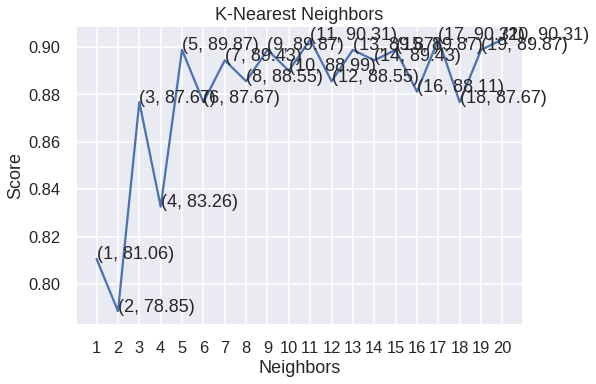

In [ ]:
plt.plot([i for i in range(1, 21)], knn)
for i in range(1, 21):
    plt.text(i, knn[i - 1], (i, round(knn[i - 1]*100, 2)))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Neighbors')
plt.ylabel('Score')
plt.title('K-Nearest Neighbors')

**SVM classifier**

In [ ]:
svc = []
activators = ['poly', 'sigmoid', 'linear', 'rbf']
for i in range(len(activators)):
    SVclassifier = SVC(kernel = activators[i])
    SVclassifier.fit(X_train,y_train)
    svc.append(SVclassifier.score(X_test,y_test ))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, log_loss
from sklearn import metrics
from sklearn import metrics

print('Confusion matrix of model',i , 'is :')
cm = confusion_matrix(y_test ,  SVclassifier.predict( X_test))
TP = cm[0][0]
TN = cm[1][1]
FP = cm[1][0]
FN = cm[0][1]
print(cm)
print()
result1 = classification_report(y_test ,  SVclassifier.predict(X_test))
print("Classification Report : ",)
print (result1)
print()
var = ((TP + TN)/(TP + TN + FP + FN)) *100
print('Testing accuracy : ',var)
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, SVclassifier.predict(X_test)))
print('Mean Squared Error:', metrics.mean_squared_error(y_test ,  SVclassifier.predict(X_test)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,  SVclassifier.predict( X_test))))
print('Log_Loss:', metrics.log_loss(y_test,  SVclassifier.predict(X_test)))

Confusion matrix of model 39 is :
[[ 85  12]
 [  5 125]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        97
           1       0.91      0.96      0.94       130

    accuracy                           0.93       227
   macro avg       0.93      0.92      0.92       227
weighted avg       0.93      0.93      0.92       227


Testing accuracy :  92.51101321585902
Sensitivity :  0.8762886597938144
Specificity :  0.9615384615384616
false positive rate :  0.038461538461538464
false negative rate :  0.12371134020618557
Negative Predictive Value :  0.9124087591240876
False Discovery rate :  0.05555555555555555
Mean Absolute Error: 0.07488986784140969
Mean Squared Error: 0.07488986784140969
Root Mean Squared Error: 0.2736601319911428
Log_Loss: 2.5866466690865377


Text(0.5, 1.0, 'Support Vector Classifier')

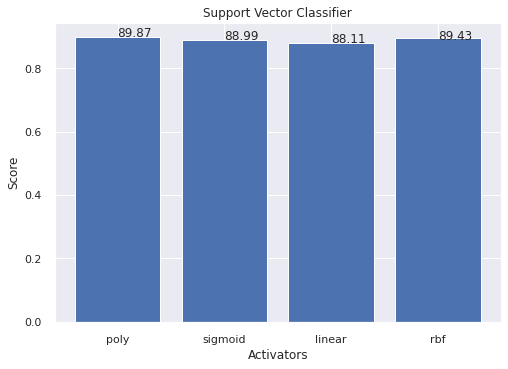

In [ ]:
plt.bar(activators, svc)
for i in range(len(activators)):
    plt.text(i, round(svc[i],2), round(svc[i]*100,2))
plt.xlabel('Activators')
plt.ylabel('Score')
plt.title('Support Vector Classifier')

##MLP classifier**

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = []
hidden_units = [10, 20, 40, 50, 60, 70, 200, 300, 400, 500, 600]

for i in range(len(hidden_units)):
    MLPc = MLPClassifier(hidden_layer_sizes = (hidden_units[i],))
    MLPc.fit(X_train, y_train)
    mlp.append(MLPc.score(X_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, log_loss
from sklearn import metrics
from sklearn import metrics

print('Confusion matrix of model',i , 'is :')
cm = confusion_matrix(y_test, MLPc.predict(X_test))
TP = cm[0][0]
TN = cm[1][1]
FP = cm[1][0]
FN = cm[0][1]
print(cm)
print()
result1 = classification_report(y_test, MLPc.predict(X_test))
print("Classification Report : ",)
print (result1)
print()
var = ((TP + TN)/(TP + TN + FP + FN)) *100
print('Testing accuracy : ',var)
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, MLPc.predict(X_test)))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, MLPc.predict(X_test)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, MLPc.predict(X_test))))
print('Log_Loss:', metrics.log_loss(y_test, MLPc.predict(X_test)))

Confusion matrix of model 3 is :
[[106   3]
 [  7 111]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       109
           1       0.97      0.94      0.96       118

    accuracy                           0.96       227
   macro avg       0.96      0.96      0.96       227
weighted avg       0.96      0.96      0.96       227


Testing accuracy :  95.59471365638767
Sensitivity :  0.9724770642201835
Specificity :  0.940677966101695
false positive rate :  0.059322033898305086
false negative rate :  0.027522935779816515
Negative Predictive Value :  0.9736842105263158
False Discovery rate :  0.061946902654867256
Mean Absolute Error: 0.04405286343612335
Mean Squared Error: 0.04405286343612335
Root Mean Squared Error: 0.20988774008055675
Log_Loss: 1.5215425671427207


**LogisticRegression classifier**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
s = np.mean(cross_val_score(lr,X_train,y_train,scoring='roc_auc',cv=5))
print('The accuracy score for Logistic Regression is: ', s*100)

The accuracy score for Logistic Regression is:  92.00216207601586
